In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from pylab import rcParams #customizing plot display options
import numpy as np
import seaborn as sns
import os

# from sklearn.ensemble import RandomForestRegressor # Random Forest Algorithm
# from sklearn.model_selection import train_test_split # Split the dataset into trainning and testing subsets
# from sklearn.model_selection import GridSearchCV # perform an exhautive search over specified parameter values
# from sklearn.feature_selection import RFECV #selects the optimal subset of features
# from sklearn.feature_selection import SelectFromModel, SelectKBest #For feature selection based on model importance or statistical tests
# from sklearn.preprocessing import StandardScaler   #For standardizing fearures by removing the mean and scaling to unit variance
# from sklearn import metrics #provides various metrics for evaluating machine learning models.

%matplotlib inline


In [3]:
stock = pd.read_csv('../Data/MSFT_historical_data_yfinance.csv',index_col=0)

df_Stock = stock
df_Stock.head()

,High,Low,Close,Volume,Date
Open,,,,,
31.509763,31.535026,30.836118,30.895061,40066100,2013-12-13
30.928732,31.156088,30.768743,31.063461,31734200,2013-12-16
31.105562,31.248713,30.591910,30.751900,45687700,2013-12-17
30.617180,30.819271,29.918271,30.802433,63192100,2013-12-18
30.743483,30.777166,30.381401,30.524549,34160100,2013-12-19


In [189]:
df_Stock.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-11-08,243.490005,244.750000,242.800003,243.910004,243.910004,5117500
2023-11-09,244.330002,244.479996,240.970001,241.639999,241.639999,4866600
2023-11-10,243.979996,245.270004,241.970001,245.250000,245.250000,4094400
2023-11-13,245.000000,245.679993,244.110001,244.669998,244.669998,4088500
2023-11-14,246.169998,247.929993,245.580002,246.940002,246.940002,14091700


In [190]:
df_Stock.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [191]:
df_Stock.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

# AAAL TIME SERIES CHART

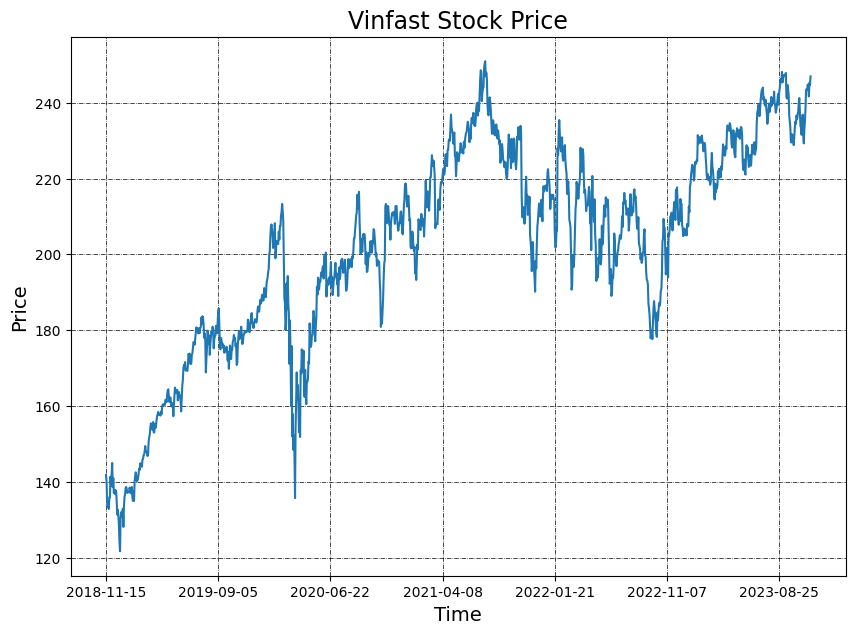

In [192]:
df_Stock['Close'].plot(figsize=(10,7))
plt.title('Vinfast Stock Price',fontsize=17)
plt.ylabel('Price', fontsize=14)
plt.xlabel('Time',fontsize=14)
plt.grid(which='major',color='k', linestyle='-.',linewidth=0.5)
plt.show()

# SET OF TEST TRAIN

In [193]:
def create_train_test_test(df_Stock):
    features = df_Stock.drop(['Adj Close'],axis=1)
    target = df_Stock['Adj Close']
    
    data_len = df_Stock.shape[0]
    print('Historical Stock Data length is - ', str(data_len))
    
    #create a chronological split for train and testing
    train_split = int(data_len * 0.88)
    print('Training Set length - ', str(train_split))

    val_split = train_split + int(data_len * 0.1)
    print('Validation Set length - ', str(int(data_len * 0.1)))
    
    print('Test Set length - ', str(int(data_len * 0.02)))
    
    #Splitting features and target into train, validation and test examples
    X_train, X_val, X_test = features[:train_split], features[train_split:val_split], features[val_split:]
    Y_train, Y_val, Y_test = target[:train_split], target[train_split:val_split], target[val_split:]
    
    #Print shape of samples
    print(X_train.shape, X_val.shape, X_test.shape)
    print(Y_train.shape, Y_val.shape, Y_test.shape)
    
    return X_train, X_val, X_test, Y_train, Y_val, Y_test


X_train, X_val, X_test, Y_train, Y_val, Y_test = create_train_test_test(df_Stock)
X_train.columns

Historical Stock Data length is -  1257
Training Set length -  1106
Validation Set length -  125
Test Set length -  25
(1106, 5) (125, 5) (26, 5)
(1106,) (125,) (26,)


Index(['Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')

# LINEAR REGRESSION PREDICTION

In [194]:

from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, Y_train)


LinearRegression()

In [195]:
print('LR Coefficients: \n',lr.coef_)
print('LR Intercept: \n', lr.intercept_)

LR Coefficients: 
 [-3.53801500e-02  2.19697851e-01 -1.55108419e-01  9.84988067e-01
 -7.70005271e-08]
LR Intercept: 
 -6.836023669877761


# ANALYSE

In [196]:
print('Performance (R2):',lr.score(X_train, Y_train))

Performance (R2): 0.9984582311690616


In [197]:
def get_mape(y_true, y_pred):
    """
    Compute mean absolute percentage error (MAPE)
    """
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true-y_pred)/y_true))*100

# TEST DATASET PREDICTION

In [198]:
Y_train_pred = lr.predict(X_train)
Y_val_pred = lr.predict(X_val)
Y_test_pred = lr.predict(X_test)

In [199]:
"""
 A comprehensive assessment of the linear regression model’s performance on the training, validation, 
 and test sets. Metrics provide insight into the model’s accuracy, fit, and predictive capability, 
 as well as how well it performs on different datasets.
"""

print("Training R-squared: ",round(metrics.r2_score(Y_train,Y_train_pred),2))
print("Training Explained Variation: ",round(metrics.explained_variance_score(Y_train,Y_train_pred),2))
print('Training MAPE:', round(get_mape(Y_train,Y_train_pred), 2)) 
print('Training Mean Squared Error:', round(metrics.mean_squared_error(Y_train,Y_train_pred), 2)) 
print("Training RMSE: ",round(np.sqrt(metrics.mean_squared_error(Y_train,Y_train_pred)),2))
print("Training MAE: ",round(metrics.mean_absolute_error(Y_train,Y_train_pred),2))

print(' ')

print("Validation R-squared: ",round(metrics.r2_score(Y_val,Y_val_pred),2))
print("Validation Explained Variation: ",round(metrics.explained_variance_score(Y_val,Y_val_pred),2))
print('Validation MAPE:', round(get_mape(Y_val,Y_val_pred), 2)) 
print('Validation Mean Squared Error:', round(metrics.mean_squared_error(Y_train,Y_train_pred), 2)) 
print("Validation RMSE: ",round(np.sqrt(metrics.mean_squared_error(Y_val,Y_val_pred)),2))
print("Validation MAE: ",round(metrics.mean_absolute_error(Y_val,Y_val_pred),2))

print(' ')

print("Test R-squared: ",round(metrics.r2_score(Y_test,Y_test_pred),2))
print("Test Explained Variation: ",round(metrics.explained_variance_score(Y_test,Y_test_pred),2))
print('Test MAPE:', round(get_mape(Y_test,Y_test_pred), 2)) 
print('Test Mean Squared Error:', round(metrics.mean_squared_error(Y_test,Y_test_pred), 2)) 
print("Test RMSE: ",round(np.sqrt(metrics.mean_squared_error(Y_test,Y_test_pred)),2))
print("Test MAE: ",round(metrics.mean_absolute_error(Y_test,Y_test_pred),2))

Training R-squared:  1.0
Training Explained Variation:  1.0
Training MAPE: 0.45
Training Mean Squared Error: 1.12
Training RMSE:  1.06
Training MAE:  0.88
 
Validation R-squared:  0.88
Validation Explained Variation:  1.0
Validation MAPE: 1.05
Validation Mean Squared Error: 1.12
Validation RMSE:  2.48
Validation MAE:  2.45
 
Test R-squared:  0.67
Test Explained Variation:  1.0
Test MAPE: 1.21
Test Mean Squared Error: 8.39
Test RMSE:  2.9
Test MAE:  2.88


In [200]:
df_pred = pd.DataFrame(Y_val.values, columns=['Actual'], index=Y_val.index)
df_pred['Predicted'] = Y_val_pred
# df_pred = df_pred.reset_index()
# df_pred['Date'] = pd.to_datetime(df_pred['Date'], format='%Y-%m-%d')
df_pred

,Actual,Predicted
Date,,
2023-04-12,226.457855,224.701452
2023-04-13,231.308899,229.321765
2023-04-14,232.631012,230.278920
2023-04-17,232.094208,230.084260
2023-04-18,232.213516,230.162503
...,...,...
2023-10-03,228.323914,225.539311
2023-10-04,230.728790,227.778475
2023-10-05,232.983978,230.257305


# PREDICTED VS ACTUAL PRICES ON TIME SERIES PLOT

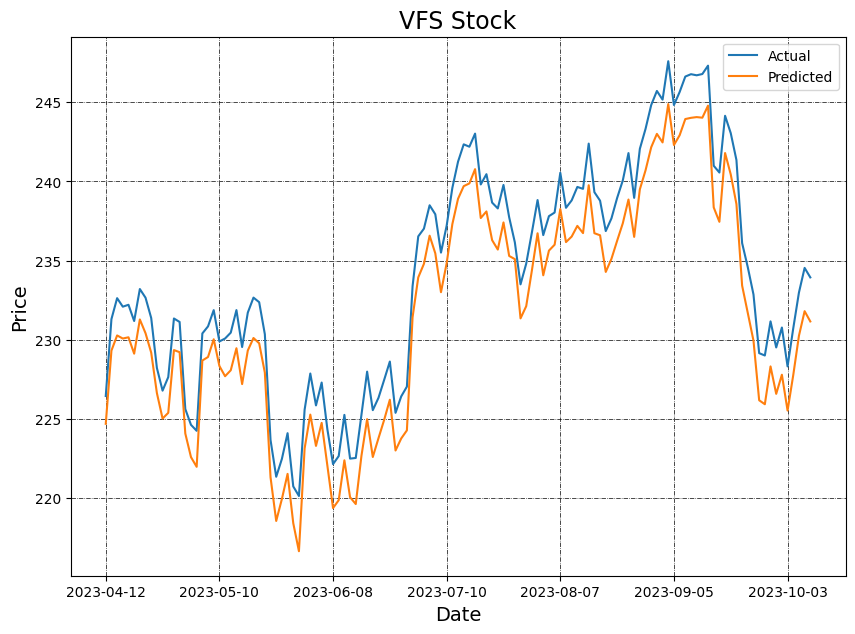

In [201]:
df_pred[['Actual', 'Predicted']].plot(figsize=(10,7))
plt.title('VFS Stock',fontsize=17)
plt.ylabel('Price', fontsize=14)
plt.xlabel('Date',fontsize=14)
plt.grid(which='major',color='k', linestyle='-.',linewidth=0.5)
plt.show()